Machine Learning

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import pandas.util.testing as tm
import matplotlib.pyplot as plt

In [8]:
data_df=pd.read_csv('/content/drive/MyDrive/Data/SalesvProductionDOWData.csv')


In [9]:
data_df.head()

,Date,Production,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Sales,DOW
0,1/1/2017,26879.0,1,0,0,0,0,0,26174.45,Sunday
1,1/2/2017,22456.0,0,1,0,0,0,0,52560.55,Monday
2,1/3/2017,17247.0,0,0,1,0,0,0,46779.68,Tuesday
3,1/4/2017,20987.0,0,0,0,1,0,0,44393.35,Wednesday
4,1/5/2017,21905.0,0,0,0,0,1,0,45602.32,Thursday


In [10]:
# Define x and y
x=data_df.drop(['Date', 'Sales', 'DOW'], axis=1).values # create the independent variables dataframe
y=data_df['Sales'].values # create the dependent variable array 
   

In [11]:
print(x) # display independent variables

[[2.687900e+04 1.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [2.245600e+04 0.000000e+00 1.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [1.724700e+04 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 ...
 [2.026900e+04 0.000000e+00 1.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [2.526801e+04 0.000000e+00 0.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [3.621200e+04 0.000000e+00 0.000000e+00 ... 1.000000e+00 0.000000e+00
  0.000000e+00]]


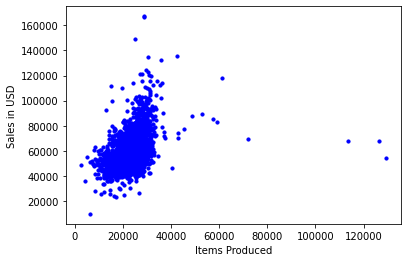

In [12]:
plt.xlabel("Items Produced")
plt.ylabel("Sales in USD")
plt.scatter(data_df.Production,data_df.Sales, c="blue",s=10)

In [13]:
#print(y) to display target variable values
print(y)

[26174.45 52560.55 46779.68 ... 82851.82 82212.81 79115.9 ]


In [14]:
# Split dataset into training and testing datasets
from sklearn.model_selection import train_test_split # get the train test and split function from the sklearn library
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0) # will test on 30% of data


In [15]:
# train the Model on the Training set
from sklearn.linear_model import LinearRegression
ml=LinearRegression() # create the model
ml.fit(x_train,y_train) # fit the model
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(normalize=False)

In [16]:
# Use trained model to predict the target variable (we know these values, it's how we can tell the accuracy of the model before putting into production)
y_pred = ml.predict(x_test)
print(y_pred)


[ 78571.97596376  56168.31254085  59805.08564081  55380.1546646
  56829.72732697  59049.91037412  57381.51519015  62747.30461787
  57912.7096028   80968.36813461  77623.61944173  80879.66647444
  58374.48203722  60254.84247237  55618.62911241  57703.39573962
  55950.13347544  56934.48564493  49990.0091654   56935.01826467
  76805.86181314  58972.21784483  54770.589411    55434.78861599
  51135.48048779  59959.2831038   68328.87181961  79946.26586559
  57418.34244621  57706.93636399  57350.4044945   63076.1091936
  69370.95436157  83666.62852717  78864.20210136  59792.38082536
  78250.10679272  79731.90696626  56720.1494175   57882.57274213
  80505.9064876   59843.38255692  51446.97501385  68853.36949172
  56347.99529599  51711.47605505  65589.94099219  77964.77967313
  53964.6912722   59421.58445265  78763.58395554  58069.85007302
  54607.73350957  53305.62477267  54101.13269286  59817.19247855
  55842.80246848  67531.45285451  58793.01567965  56633.71953144
  57387.2983157   57741.789

In [18]:
# input a row of values for the independent variables and see how close it gets to predicting the already known target variable
ml.predict([[61037, 0, 0, 0, 0, 0, 0]])  # the actual value for profit is 41754.42, if you refit the model, the prediction will (should) change

array([101256.71910762])

In [19]:
# R-Square tells how much of the variation in the dependent variable can be explained by the independent variables used in the regression
# This means, 10% of the variation can be explained
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.319072553050206

### **Plot Results**

Text(0.5, 1.0, 'Actual vs. Predicted')

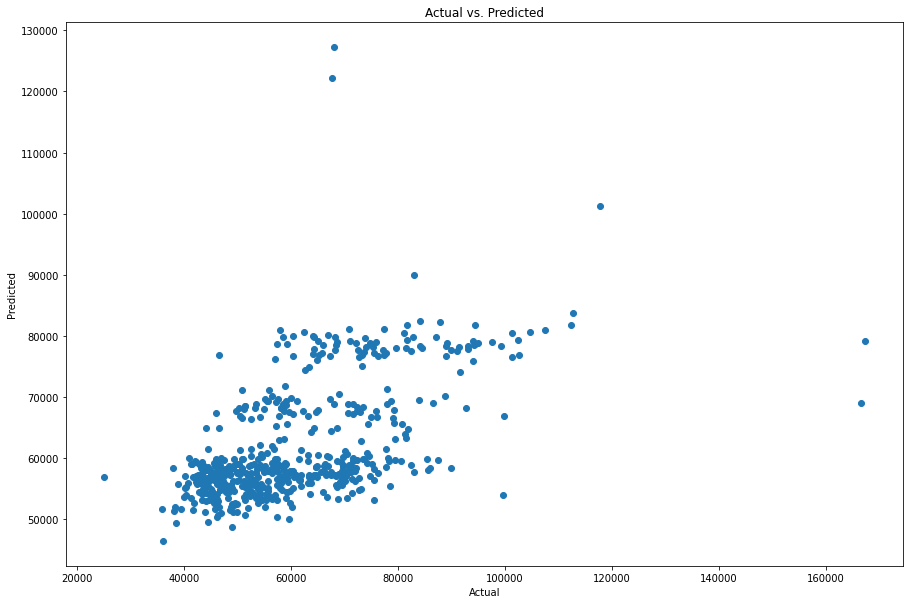

In [20]:
# Plot the actual values and the predicte values (y)
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred) 
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
# This shows a moderate to low positive correlation

Predicted Values

In [21]:
#Predicted Values of "y" from the test set
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test - y_pred})
pred_y_df[0:20]
# Especially when the prediction is being made by a glorified adding machine

,Actual Value,Predicted Value,Difference
0,65928.35,78571.975964,-12643.625964
1,51222.42,56168.312541,-4945.892541
2,46043.26,59805.085641,-13761.825641
3,44410.41,55380.154665,-10969.744665
4,60648.42,56829.727327,3818.692673
5,53087.60,59049.910374,-5962.310374
6,48616.99,57381.515190,-8764.525190
7,73098.35,62747.304618,10351.045382
8,50906.17,57912.709603,-7006.539603
9,57906.71,80968.368135,-23061.658135
